In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.2, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

############### A more detailed explanation to why we transformed the data the way we did can be found in credit_analysis.py ###############

### Prepare this dataset to be used for further analysis
## Import dataframe
# df_credit = pd.read_csv("c:/Users/Jhanava/Desktop/2020 FALL/CAP5610 - Introduction to Machine Learning/Final project/data/creditcard.csv")
#df_credit = pd.read_csv("../data/creditcard.csv")
df_credit = pd.read_csv("C:\\Users\\Adnrew\\Dropbox\\dataSets\\creditcard.csv")
#df_credit = pd.read_csv("https://www.kaggle.com/mlg-ulb/creditcardfraud/download")


# Shuffle data entries
df_credit = df_credit.sample(frac=1)

# find column names and save them (convenience)
columns = df_credit.columns[:]

# Split entries evenly by class
df_fraud = df_credit.loc[df_credit['Class'] == 1]
df_nonfraud = df_credit.loc[df_credit['Class'] == 0][:len(df_fraud.index)]

# Combine evenly split entries
df_credit_even = pd.concat([df_fraud, df_nonfraud])

# Shuffle again
df_credit_even = df_credit_even.sample(frac=1)

## Encode data

# Display data type of columns in the data frame
# print(df_credit.dtypes)

# The data types have already been assigned the correct data types.
# No need for further changes in regards to encoding.

## Perform appropriate scaling
sc = StandardScaler()

# Scale Time and Amount values (this data will use df_credit_even)
df_credit_scaled = df_credit_even.assign(Time=sc.fit_transform(df_credit_even['Time'].values.reshape(-1, 1)),
                                    Amount=sc.fit_transform(df_credit_even['Amount'].values.reshape(-1, 1)))

## Obtain values from dataframe columns and assign them appropriately
# iloc is a purely integer-location based indexing for selction by position.
# iloc is used to select data that is to be stored in X and y.
# X gets the whole row between the first column and second to last column.
# y gets the whole last column.
X, y = df_credit.iloc[:, :-1].values, df_credit.iloc[:, -1].values

#scaled
X_scaled, y_scaled = df_credit_scaled.iloc[:, :-1].values, df_credit_scaled.iloc[:, -1].values

## Split between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1, stratify = y)

#scaled
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, train_size = 0.8, test_size = 0.2, random_state = 1, stratify = y_scaled)

# standardize training feature data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#scaled
X_train_scaled_std = sc.fit_transform(X_train_scaled)
X_test_scaled_std = sc.transform(X_test_scaled)

# take 10% of the data to perform functions faster
small_credit = df_credit.sample(frac=0.1)
small_X, small_y = small_credit.iloc[:, :-1].values, small_credit.iloc[:, -1].values

small_X_train, small_X_test, small_y_train, small_y_test = train_test_split(small_X, small_y, train_size = 0.8, test_size = 0.2, random_state = 1, stratify = small_y)

small_X_train_std = sc.fit_transform(small_X_train)
small_X_test_std = sc.transform(small_X_test)


#scaled
small_credit_scaled = df_credit_scaled.sample(frac=0.1)
small_X_scaled, small_y_scaled = small_credit_scaled.iloc[:, :-1].values, small_credit_scaled.iloc[:, -1].values

small_X_train_scaled, small_X_test_scaled, small_y_train_scaled, small_y_test_scaled = train_test_split(small_X_scaled, small_y_scaled, train_size = 0.8, test_size = 0.2, random_state = 1, stratify = small_y_scaled)

small_X_train_scaled_std = sc.fit_transform(small_X_train_scaled)
small_X_test_scaled_std = sc.transform(small_X_test_scaled)

amount of class 0 (no fraud):  284315
amount of class 1 (fraud):  492
0.173 % of the data are fraudulent credit charges
amount of class 0 (no fraud):  492
amount of class 1 (fraud):  492
            Amount         Amount
count   492.000000  284315.000000
mean    122.211321      88.291022
std     256.683288     250.105092
min       0.000000       0.000000
25%       1.000000       5.650000
50%       9.250000      22.000000
75%     105.890000      77.050000
max    2125.870000   25691.160000
                Time           Time
count     492.000000  284315.000000
mean    80746.806911   94838.202258
std     47835.365138   47484.015786
min       406.000000       0.000000
25%     41241.500000   54230.000000
50%     75568.500000   84711.000000
75%    128483.000000  139333.000000
max    170348.000000  172792.000000


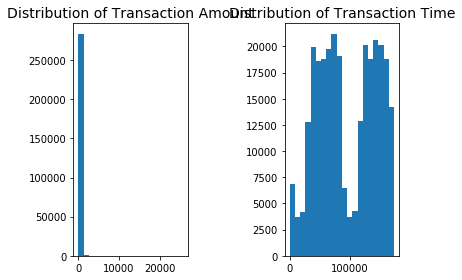

Before StandardScaler fitting and transformation: 
             Time        V1        V2        V3        V4        V5        V6  \
181689  125082.0  2.043709 -0.892194 -1.123701 -2.013410 -0.593415 -0.527681   
129053   78934.0  1.296820  0.220623 -0.177184  0.309735  0.188966 -0.098132   
195174  130932.0  1.941891 -0.051154 -1.778029  1.241271  0.469804 -0.662244   
167088  118479.0  1.912811 -1.146342 -1.045496 -0.705441 -0.822118 -0.862259   
44871    42120.0 -0.862026  1.249988  1.289397 -0.113376 -0.181726 -0.243820   

              V7        V8        V9  ...       V21       V22       V23  \
181689 -0.589266  0.022519  2.520677  ...  0.297748  1.250560 -0.018839   
129053 -0.093642  0.061291 -0.032532  ... -0.321942 -0.994024 -0.017619   
195174  0.472463 -0.170644  0.199761  ...  0.082538  0.278919 -0.065960   
167088 -0.349276 -0.334679 -0.429257  ...  0.308216  0.663344  0.093662   
44871   0.249797  0.583250 -0.972365  ... -0.079235 -0.271863  0.080823   

             V24

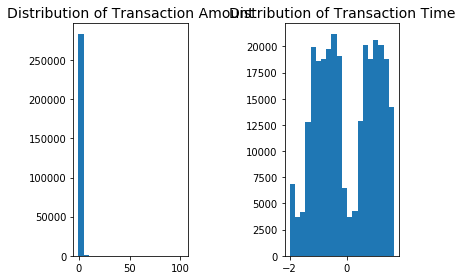

In [4]:
import pandas as pd
import matplotlib.pyplot as plt



### The dataframe was said to be imbalanced on the website,
### but how imbalanced?

# Here, we can print how many entries have a class of 0 and
# how many entries have a class of 1.
num_of_nofraud = df_credit['Class'].value_counts()[0]
num_of_fraud = df_credit['Class'].value_counts()[1]
print('amount of class 0 (no fraud): ', num_of_nofraud)
print('amount of class 1 (fraud): ', num_of_fraud)

## Percentage calculation:
print(round(num_of_fraud/len(df_credit) * 100, 3), '% of the data are fraudulent credit charges')

# This percentage is incredibly low! over 99% of the data
# in this set is of class 0.

# **the imbalanced nature of this data means we need to create a sample where the number of
# fraudulent charges and number of non-fraudulent charges are equal (50/50)**

### The classes need to be evenly distributed in order to get
### a less imbalanced model and avoid overfitting.

## First let's randomize the entries of the dataframe:
# Using sample(frac=1) on the credit dataframe shuffles the data
# randomly, but keeps all the entries intact. We do this to keep
# the data we work on random and independent from our influence.
df_credit = df_credit.sample(frac=1)

## Second we should split the data evenly between fraud and
## non-fraud.
df_fraud = df_credit.loc[df_credit['Class'] == 1]

# We know that there are 492 fraud entries, so we should limit the
# number of non fraudulent entries to 492 to keep it even.
df_nonfraud = df_credit.loc[df_credit['Class'] == 0][:len(df_fraud.index)]

## Third, we combine the data frames we created into one evenly
## distributed dataframe.
df_credit_even = pd.concat([df_fraud, df_nonfraud])

# Shuffle again
df_credit_even = df_credit_even.sample(frac=1)

## Finally, we can prove to ourselves that the Class column is now
## evenly distributed: equal 0's and 1's.
num_of_nofraud = df_credit_even['Class'].value_counts()[0]
num_of_fraud = df_credit_even['Class'].value_counts()[1]
print('amount of class 0 (no fraud): ', num_of_nofraud)
print('amount of class 1 (fraud): ', num_of_fraud)

# **This distribution will be done in the credit_data.py file.
#   The new dataframe is called "df_credit_even".**

### The only two values that have a description are time and
### and Amount, so we can use these two features to see how
### fraudulant charges and non-fraudulant charges differ in
### these values.

fraud = df_credit[df_credit['Class'] == 1]
nonfraud = df_credit[df_credit['Class'] == 0]

## How the amount spent relates to fraudulent charges
print(pd.concat([fraud.Amount.describe(), nonfraud.Amount.describe()], axis=1))

## How the time frame between purchases relates to fraudulent charges
print(pd.concat([fraud.Time.describe(), nonfraud.Time.describe()], axis=1))


### "Features V1, V2, … V28 are the principal components
### obtained with PCA, the only features which have not
### been transformed with PCA are 'Time' and 'Amount'."

## lets see what amount and time look like
amount_val = df_credit['Amount'].values
time_val = df_credit['Time'].values
n_bins = 20

fig, axs = plt.subplots(1, 2, tight_layout=True)

# a histogram will be used to see the general distribution
# of values through a histogram.
axs[0].set_title('Distribution of Transaction Amount', fontsize=14)
axs[0].hist(amount_val, bins=n_bins)

axs[1].set_title('Distribution of Transaction Time', fontsize=14)
axs[1].hist(time_val, bins=n_bins)

# V1_val = df_credit['V1'].values
# axs[1].set_title('Distribution of V1', fontsize=14)
# axs[1].hist(V1_val, bins=n_bins)

# **through these histograms, we can see how skewed these features are.
#   The values range so greatly compared to the already scaled features
#   (V1 - V28) **

plt.show()

### We need to scale the Time and Amount column so that it can match the same
### range and distribution pattern like the other feature values.

sc = StandardScaler()

## Before the standard scaler fitting and transformation
print("Before StandardScaler fitting and transformation: \n", df_credit.head())

## Time and Amount will be transformed with StandardScaler
df_credit = df_credit.assign(Time=sc.fit_transform(df_credit['Time'].values.reshape(-1, 1)),
                             Amount=sc.fit_transform(df_credit['Amount'].values.reshape(-1, 1)))

## See what the new transformed columns look like
print("After StandardScaler fitting and transformation: \n", df_credit.head())

# Create a histogram with these new values
amount_val = df_credit['Amount'].values
time_val = df_credit['Time'].values

print(time_val)
n_bins = 20

fig, axs = plt.subplots(1, 2, tight_layout=True)

axs[0].set_title('Distribution of Transaction Amount', fontsize=14)
axs[0].hist(amount_val, bins=n_bins)

axs[1].set_title('Distribution of Transaction Time', fontsize=14)
axs[1].hist(time_val, bins=n_bins)

plt.show()

# **This scaling will be done in the credit_data.py file.
#   The new dataframe is called "df_credit_scaled".**


# print("PATH: ", os.path)


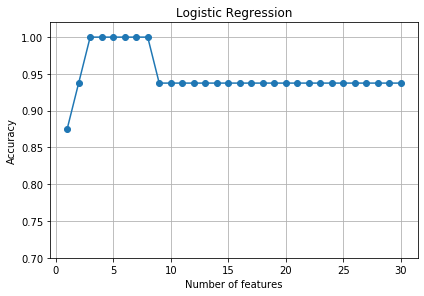

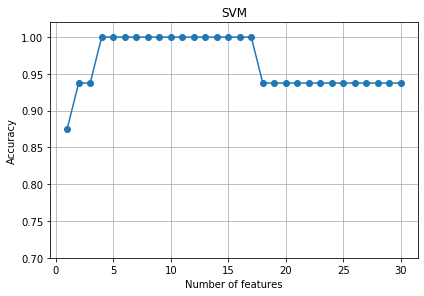

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


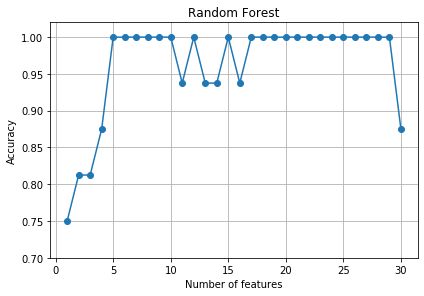

 1) V15                            0.136950
 2) V13                            0.126901
 3) V11                            0.118241
 4) V18                            0.087253
 5) V8                             0.062322
 6) V17                            0.056684
 7) V22                            0.048136
 8) V4                             0.043801
 9) V5                             0.035468
10) V12                            0.033307
11) V10                            0.029640
12) V3                             0.028271
13) V9                             0.021593
14) V6                             0.021174
15) V20                            0.016188
16) V7                             0.016121
17) Amount                         0.014347
18) V19                            0.014010
19) V21                            0.010189
20) V2                             0.010017
21) V25                            0.009039
22) V24                            0.008322
23) V14                         

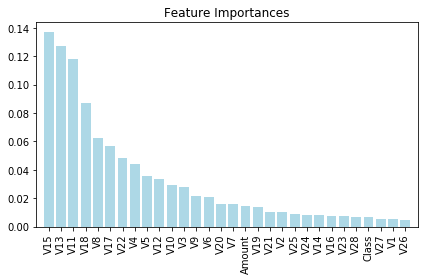

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np


## Declare the learning algorithms that will be used
lreg = LogisticRegression(solver="lbfgs",max_iter=10000)
svm = SVC(gamma="auto")
rf = RandomForestClassifier()

### selecting features
## Logistic Regression
sbs = SBS(lreg, k_features=1)
sbs.fit(small_X_train_scaled_std, small_y_train_scaled)

# plot
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.title("Logistic Regression")
plt.show()

## SVM
sbs = SBS(svm, k_features=1)
sbs.fit(small_X_train_scaled_std, small_y_train_scaled)

# plot
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.title("SVM")
plt.show()

## Random Forest
sbs = SBS(rf, k_features=1)
sbs.fit(small_X_train_scaled_std, small_y_train_scaled)

# plot
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.title("Random Forest")
plt.show()
  


# print(small_y)
# print(small_X)



#Æ
feat_labels = df_credit.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(small_X_train_scaled_std, small_y_train_scaled)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(small_X_train_scaled_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(small_X_train_scaled_std.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')

plt.xticks(range(small_X_train_scaled_std.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, small_X_train_scaled_std.shape[1]])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV



### Setup pipes

pipe_lr = make_pipeline(StandardScaler(),
                         LogisticRegression(random_state=1, max_iter=10000))
pipe_svm = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
pipe_rf = make_pipeline(StandardScaler(),
                        RandomForestClassifier())

# Grid search feature extraction

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# Grid Search on lr
param_grid = [{'logisticregression__C': param_range, 
               'logisticregression__solver': ['lbfgs'],
               'logisticregression__penalty':['l2']},
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['liblinear'],
               'logisticregression__penalty':['l1','l2']},
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['sag'],
               'logisticregression__penalty':['l2']}]

gs = GridSearchCV(pipe_lr, 
                  param_grid,
                  n_jobs=-1)
gs = gs.fit(small_X_train_scaled_std, small_y_train_scaled)
print('Grid Search best score (LR): %f' % gs.best_score_)
print('Grid Search best params(LR): ', gs.best_params_)

# Grid Search on svm
param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(pipe_svm, 
                  param_grid, 
                  n_jobs=-1)
gs = gs.fit(small_X_train_scaled_std, small_y_train_scaled)
print('Grid Search best score (SVM): %f' % gs.best_score_)
print('Grid Search best params (SVM): ', gs.best_params_)

# Grid Search on rf
param_grid = [{'randomforestclassifier__n_estimators': [100, 120, 140, 160, 180, 200], 
               'randomforestclassifier__max_depth': [5, 10, 20, 30, None],
               'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 1}, {0: 1, 1: 5}]}]

gs = GridSearchCV(pipe_rf,
                  param_grid,
                  n_jobs=-1)
gs = gs.fit(small_X_train_scaled_std, small_y_train_scaled)
print('Grid Search best score (RF): %f' % gs.best_score_)
print('Grid Search best params (RF): ', gs.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search best score (LR): 0.897436
Grid Search best params(LR):  {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search best score (SVM): 0.897436
Grid Search best params (SVM):  {'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Grid Search best score (RF): 0.910256
Grid Search best params (RF):  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 140}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test Accuracy: 0.883

CV accuracy: 0.904 +/- 0.031
CV accuracy scores: [0.875      0.925      0.875      0.84810127 0.91025641 0.87179487
 0.92307692 0.93589744 0.93589744 0.93589744]
CV accuracy: 0.904 +/- 0.031


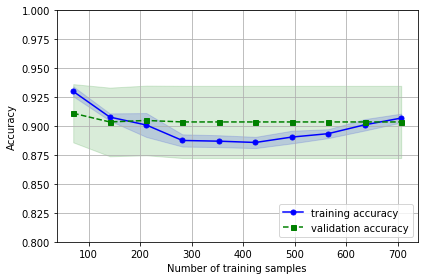

[[98  0]
 [23 76]]


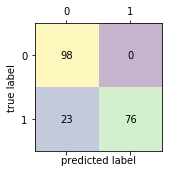

AttributeError: predict_proba is not available when  probability=False

<Figure size 504x360 with 0 Axes>

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

#pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(random_state=1, max_iter=10000))])
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', SVC(C=10,kernel='rbf',gamma=0.1))])

pipe_lr.fit(X_train_scaled, y_train_scaled)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_scaled, y_test_scaled))
y_pred = pipe_lr.predict(X_test_scaled)

kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train_scaled, y_train_scaled)

scores = []
for k,(train, test) in enumerate(kfold):
    pipe_lr.fit(X_train_scaled[train], y_train_scaled[train])
    score = pipe_lr.score(X_train_scaled[test], y_train_scaled[test])
    scores.append(score)
    #print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k + 1,np.bincount(y_train[train]), score))

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train_scaled,
                         y=y_train_scaled,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

#pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train_scaled,
                               y=y_train_scaled,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()



from sklearn.metrics import confusion_matrix

pipe_lr.fit(X_train_scaled, y_train_scaled)
y_pred = pipe_lr.predict(X_test_scaled)
confmat = confusion_matrix(y_true=y_test_scaled, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

from sklearn.metrics import roc_curve, auc
from numpy import interp

#pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])

X_train2 = X_train_scaled[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train_scaled, y_train_scaled))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train_scaled[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train_scaled[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()